<a href="https://colab.research.google.com/github/annkathrin47/Projektarbeit_Rudel_Ann-Kathrin/blob/main/CNN_Projektarbeit_Rudel_Ann-Kathrin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


7


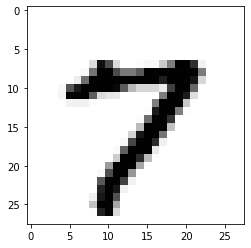

In [3]:
import matplotlib.pyplot as plt

image_index = 5555 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:

x_train.shape

(60000, 28, 28)

In [5]:

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
# Import: required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow import keras
# Create: Sequential Model and adding the layers
def get_compiled_model(learning_rate):

  model = Sequential() 
  model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #1 conv layer
  model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #2 conv layer
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
  model.add(Dense(128, activation=tf.nn.relu)) 
  model.add(Dropout(0.2))
  model.add(Dense(10,activation=tf.nn.softmax))

  # compile: mode
  adam = keras.optimizers.Adam(lr=learning_rate, decay=1e-6)
  model.compile(
      optimizer=adam,
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

  return model #0.001 and 19 Epochs

In [ ]:
epochs = [5, 10, 20, 30 , 40 , 50 ]
learning_rates = [0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04] 
results = []
for epoch in epochs:
  inner_results = []
  for learning_rate in learning_rates:
    model = get_compiled_model(learning_rate=learning_rate)
    model.fit(x=x_train, y=y_train, epochs=epoch)
    result = model.evaluate(x_test, y_test)
    inner_results.append(result)
  results.append(inner_results)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1699 - accuracy: 0.9490
Epoch 2/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0693 - accuracy: 0.9783
Epoch 3/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0478 - accuracy: 0.9846
Epoch 4/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0385 - accuracy: 0.9872
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0494 - accuracy: 0.9859
Epoch 1/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.1596 - accuracy: 0.9514
Epoch 2/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0792 - accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0640 - accuracy: 0.9799
Epoch 4/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0558 - accuracy: 0.9829
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.

9


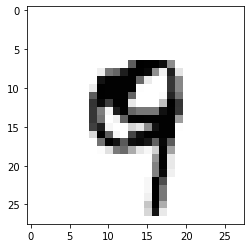

In [ ]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())